# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import random
import time
import urllib

from numpy.random import seed, randint
from matplotlib import pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# Soccer player class

In [2]:
class Player:
    """Model to represent a soccer player

    Attributes:
        ID: ID of soccer player according to FIFA 19;
        name: soccer player name;
        photo: url with soccer photo;
        nationality: player nationality;
        club: club name;
        club_logo: url with club logo photo.
    """
    
    def __init__(self, ID, name, photo, nationality, flag, club, club_logo):
        self.ID = int(ID)
        self.name = name
        self.photo = photo
        self.nationality = nationality
        self.flag = flag
        self.club = club
        self.club_logo = club_logo
    
    def __lt__(self, other):
        return self.ID < other.ID

# Read csv file with soccer player informations

In [3]:
def read_csv(filename = './assets/data.csv'): 
    """Method to read specific soccer informations from csv file
    
    attributes:
        filename: path to csv file with soccer informations.
    """
    
    df = pd.read_csv(filename, usecols=['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo'])
    
    players = []
    for index, row in df.iterrows():
        ID = int(row['ID'])
        name = row['Name']
        photo = row['Photo']
        nationality = row['Nationality']
        flag = row['Flag']
        club = row['Club']
        club_logo = row['Club Logo']
        
        player = Player(ID, name, photo, nationality, flag, club, club_logo)
        players.append(player)
        
    players.sort()
    
    return players

In [4]:
players = read_csv()

In [5]:
def show_player_informations(player):
    """show player informations, including photo
    
    Attributes:
        player: soccer player.
    
    
    OBS: INTERNET CONNECTION IS REQUIRED!
    """
    
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    
    # take photo url and increase size with replace
    player_photo = player.photo.replace(r'/4/', r'/6/')
    
    try:
        request = urllib.request.Request(player_photo, headers={'User-Agent': user_agent})
        response = urllib.request.urlopen(request)
    except e:
        print('Houve um problema na conexão com os servidores FIFA!')
    
    image = plt.imread(response, format='PNG') # read the image file in a numpy array
    image = image.copy() # avoid read-only

    plt.imshow(image)
    plt.show()
    
    print('Nome: ', player.name)
    print('Nacionalidade: ', player.nationality)
    print('Clube: ', player.club)

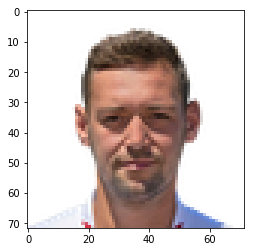

Nome:  M. Kegel
Nacionalidade:  Germany
Clube:  SC Fortuna Köln


In [6]:
random_player = random.choice(players)

show_player_informations(random_player)

# Binary Search

In [7]:
def binary_search(players, key):
    """Implementation of binary search algorithm
    
    Attributes:
        players: list with all soccer players;
        key: ID of player to search.
    """
    
    min_index = 0
    max_index = len(players)-1
    
    while (min_index <= max_index):
        middle = min_index + (max_index - min_index)//2
        
        if (players[middle].ID == key):
            return middle
        elif (players[middle].ID < key):
            min_index = middle+1
        else:
            max_index = middle-1
        
    return "Not found!"

# Ternary Search

In [8]:
def ternary_search(players, key):
    """Implementation of ternary search algorithm
    
    Attributes:
        players: list with all soccer players;
        key: ID of player to search. 
    """
    min_index = 0
    max_index = len(players)
    
    while (min_index <= max_index):
        middle1 = min_index + (max_index-min_index)//3
        middle2 = max_index - (max_index-min_index)//3
        
        if players[middle1].ID == key:
            return middle1
        
        if players[middle2].ID == key:
            return middle2
        
        if key < players[middle1].ID:
            max_index = middle1-1
        elif key > players[middle2].ID:
            min_index = middle2+1
        else:
            min_index = middle1+1
            max_index = middle2-1
    
    return "Not found!"

# Table creator to indexed searchs

In [9]:
def form_table(players, elements):
    """Create table to indexed searchs
    
    Attributes:
        players: list with all soccer players;
        elements: number of elements to form table.
    """
    
    table = []
    i=1
    while(i*elements < len(players)):
        table.append(players[i*elements].ID)
        i+=1
    return table

# Indexed Sequencial Search

In [10]:
def indexed_sequencial_search(players, key):
    """Perform indexed sequencial search algorithm
    
    Attributes:
        players: list with all soccer players;
        key: ID of player to search. 
    """
    
    index = 0;
    elements = len(players)//90;
    table1 = form_table(players,elements)
    
    for i in range(0,(len(table1) - 1)):
        if(int(table1[i]) > key) and (not i):
            index = 0
            break
        elif table1[i] == key:
            return i*elements
        elif table1[i] > key:
            index = i - 1;
            break
            
    index *= elements

    for i in range(index, (len(players)-1)):
        if (i == (index+elements)):
            break
        if (players[i].ID) == key:
            return i
    return "Not found!"

# Indexed Binary Search

In [11]:
def indexed_binary_search(players, key):
    """Perform indexed binary search algorithm
    
    Attributes:
        players: list with all soccer players;
        key: ID of player to search.
    """
    
    index = 0;
    elements = len(players)//9;
    table1 = form_table(players,elements)
    
    for i in range(0,(len(table1) - 1)):
        if(int(table1[i]) > key) and (not i):
            index = 0
            break
        elif table1[i] == key:
            return i*elements
        elif table1[i] > key:
            index = i - 1;
            break
            
    index *= elements
    if (index+elements) > (len(players)-1):
        players = players[index:]
    else:    
        players = players[index:(index+elements)]
        return binary_search(players, key)

# Algorithm complexity and graphics

In [12]:
def compute_search_time(search_method, players, random_players):
    """Method to compute the spent time of searching random players 
    
    Attributes:
        search_method: 'binary', 'ternary', 'sequencial indexed' or 'binary indexed';
        players: list with all soccer players;
        random_players: list of size 'n' with players ID.
    """
    
    search_times = list()
    
    start = time.time()
    for random_player in random_players:
        search_method(players, random_player)
    end = time.time()
    
    search_times.append(end-start)
    
    return search_times

In [13]:
def compare_algorithm_performance(players, max_quantity_players):
    """Compute algorithm performance and make graphics
    
    Attributes:
        players: list with all soccer players;
        max_quantity_players: max length of list with random players to perform comparation.
    """
    
    random_players_len = list()
    players_to_search = list() 
    iterations = max_quantity_players // 95
    
    print(">>> LOADING <<<: GENERATING GRAPHIC!")
    
    bar = IntProgress(min=0, max=iterations, description='PROGRESS:') # instantiate the bar
    display(bar)
    
    
    binary_times = []
    ternary_times = []
    indexed_sequencial_times = []
    indexed_binary_times = []
    
    for i in range(0, iterations):
        players_to_search = []

        # generate random players
        for _ in range(i * 100):
            players_to_search.append(random.choice(players).ID)

        # compute time complexity of diferent types of algorithm
        binary_times.append(compute_search_time(binary_search, players, players_to_search))
        ternary_times.append(compute_search_time(ternary_search, players, players_to_search))
        indexed_sequencial_times.append(compute_search_time(indexed_sequencial_search, players, players_to_search))
        indexed_binary_times.append(compute_search_time(indexed_binary_search, players, players_to_search))

        random_players_len.append(len(players_to_search))
        
        bar.value += 1
    
    # plot graphics
    plt.xlabel('Players to search') 
    plt.ylabel('Time Complexity')
    plt.plot(random_players_len, binary_times, label ='Binary sort') 
    plt.plot(random_players_len, ternary_times, label ='Ternary sort')
    plt.plot(random_players_len, indexed_sequencial_times, label ='Indexed sequencial sort') 
    plt.plot(random_players_len, indexed_binary_times, label ='Indexed binary sort') 

    plt.grid()
    plt.legend()
    plt.show()
    
    plt.xlabel('Players to search') 
    plt.ylabel('Time Complexity')
    plt.plot(random_players_len, binary_times, label ='Binary sort') 
    plt.plot(random_players_len, ternary_times, label ='Ternary sort')
    
    plt.grid()
    plt.legend()
    plt.show()

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=52)

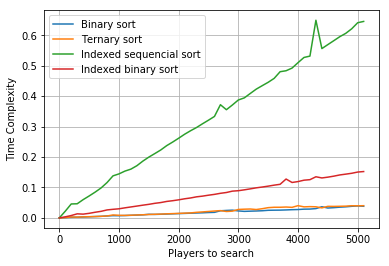

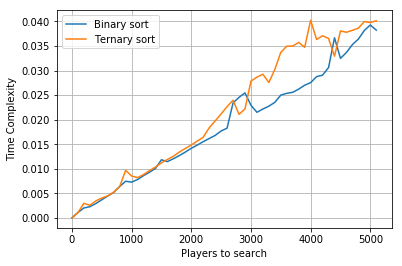

In [14]:
max_random_players = 5000
compare_algorithm_performance(players, max_random_players)